## Machine Learning Project Workflow:


<ol> 
<li>Define Objective: What you want to do ? </li>
<li>Gist of a datasets: 
  <ul>Datatypes of attributes.</ul>
  <ul>Wether continuous or decrete.</ul>
  <ul>finding stats such as min, max, std, median and so on.</ul>
  <ul>Visulize the dataset. </ul>
  <ul>Datatypes of attributes</ul></li>
<li>Define training and testing datasets per usecase e.g. random vs stratified.</li>
<li>Correlation analysis(pairwise and attribute correlation).</li>
<li>Data quality: clean the dataset (Missing values, errors, duplication, outliers etc.).</li>
<li>Data trasnformation (Like normalizing, standardization, onehot code enoder etc.).</li>
<li>Quickly define a model and see how it permorms: Base Model </li>
<li>Define model accorindig to application (ML models, DNN, CNN, RNN, etc.).</li>
<li>Hyperparmaneters tuning on the validation set</li>
<li>Carry-out different test scores(Prcision, Recall, ROC, PR, etc.) on the test set. </li>
<li>Deploy the model and use it to predict real life scenarios.</li>
 











# Objective:

Prdict median price of the houses in california <br>
We will use differtent attribute such as, 
<ul> House lcoation </ul>
<ul> Total rooms </ul>
<ul> Total bedrooms </ul>
<ul> Population </ul>
<ul> Median income </ul>
<ul> Households </ul>

And ***based on above attributes***, will predict  

<ul> Housing price </ul>





# Gist of dataset
About the data:

They built it using the 1990 California census data. <br>It contains one row per **census block group**. <br> A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

**Note:** ocean_proximity, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.

It becomes easy to prdict house price using scikit learn.<br> 
Let us impot the dataset and packages which will be helpful to carry out different opertations. 

In [ ]:
# importing necessary libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# We are mounting the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let use read the file 
housing = pd.read_csv('/content/drive/MyDrive/California House price/housing.csv')
anscombe = pd.read_csv('/content/drive/MyDrive/California House price/anscombe.csv')
print(housing.head(5))
print(anscombe.head(5))
housing.describe()

   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]
  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let us see what are the different columns we have in both csv 

1.   Housing
2.   Anscombe


In [ ]:
print('Attribute of the housing dataset:\n')
print(housing.info())
print('\nAttribute of anscombe datasets:\n')
print(anscombe.info())

Attribute of the housing dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Attribute of anscombe datasets:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  

In [ ]:
# Check the null values in the dataset
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Plotting the histogram for the categorical columns such as Ocean_proximity and others will be good to have insight. <br>
Plotting scatter plot for population and bedroom will be good to see.

In [ ]:
# Drop the null values 
housing = housing.dropna()
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Look into the data

(array([1808., 4872., 4808., 5398., 3547.]),
 array([ 1. , 11.2, 21.4, 31.6, 41.8, 52. ]),
 <a list of 5 Patch objects>)

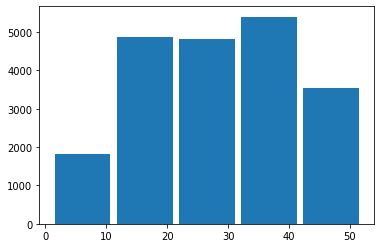

In [ ]:
# Let us visulaize the dataset
 
plt.hist(housing['housing_median_age'], bins=5, rwidth=0.9)

(array([2.270e+03, 0.000e+00, 9.034e+03, 0.000e+00, 0.000e+00, 6.496e+03,
        0.000e+00, 2.628e+03, 0.000e+00, 5.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

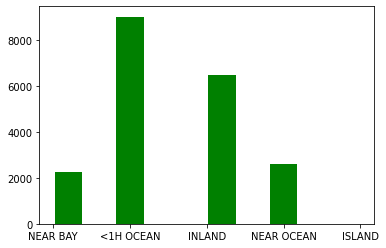

In [ ]:
plt.hist(housing['ocean_proximity'], rwidth=0.9, color='Green')

Text(0, 0.5, 'Popluation')

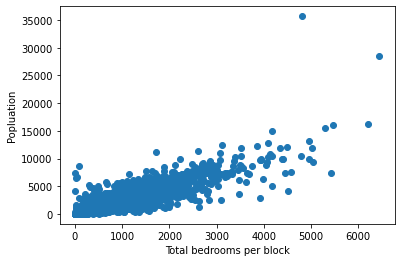

In [ ]:
plt.scatter(housing['total_bedrooms'], housing['population'])
plt.xlabel('Total bedrooms per block')
plt.ylabel('Popluation')

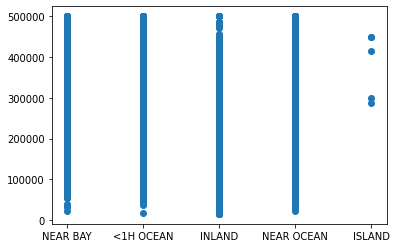

In [ ]:
plt.scatter(housing['ocean_proximity'], housing['median_house_value'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa41d7a3588>,
      dtype=object)

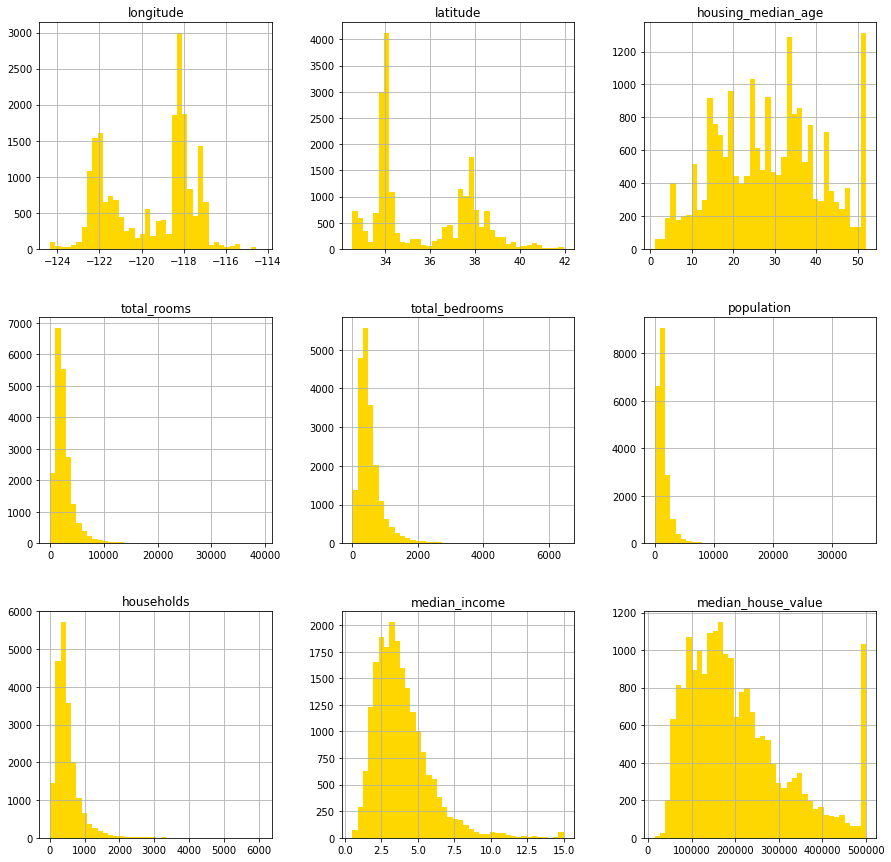

In [ ]:
housing.hist(bins=40, figsize=(15, 15), color='gold')

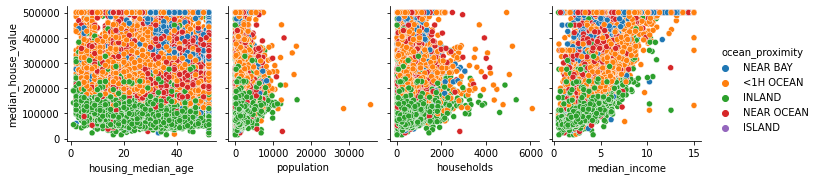

In [ ]:
# median price of the houses based on different factors 
sns.pairplot(housing, x_vars=['housing_median_age', 'population', 'households', 'median_income'],y_vars ='median_house_value',hue = 'ocean_proximity')

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


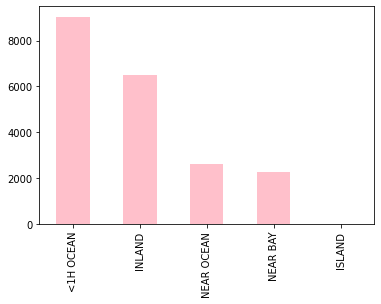

In [ ]:
print(housing['ocean_proximity'].value_counts()) # 
housing['ocean_proximity'].value_counts().plot(kind='bar', color='pink')

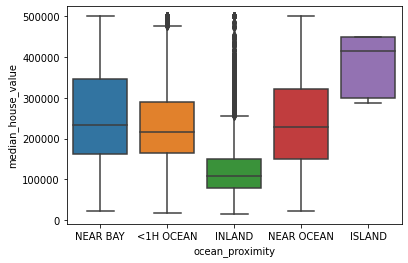

In [ ]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=housing)

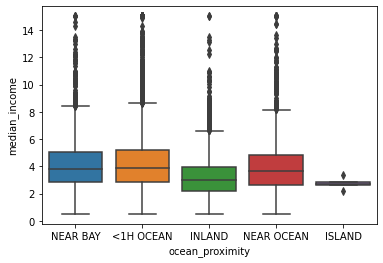

In [ ]:
sns.boxplot(x='ocean_proximity' ,y='median_income', data=housing )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


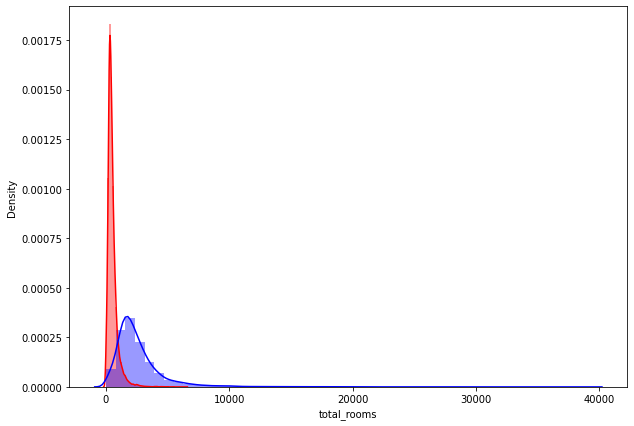

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(housing['total_bedrooms'],color='red')
sns.distplot(housing['total_rooms'],color='blue')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


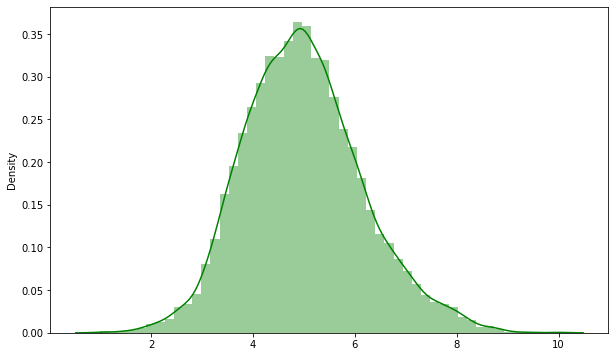

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot((housing['total_rooms']/housing['total_bedrooms']),color='green')
plt.show()

In [ ]:
housing['room_bed'] = (housing['total_rooms']/housing['total_bedrooms'])
housing['room_bed']

0        6.821705
1        6.418626
2        7.721053
3        5.421277
4        5.810714
           ...   
20635    4.451872
20636    4.646667
20637    4.647423
20638    4.547677
20639    4.521104
Name: room_bed, Length: 20433, dtype: float64

In [ ]:
# Let plot the data for specific attributes 
housing1 = housing.copy()
housing1 = housing1.loc[housing1['room_bed'] < 10.0]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


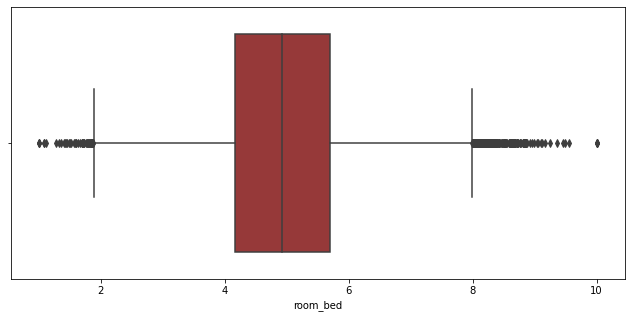

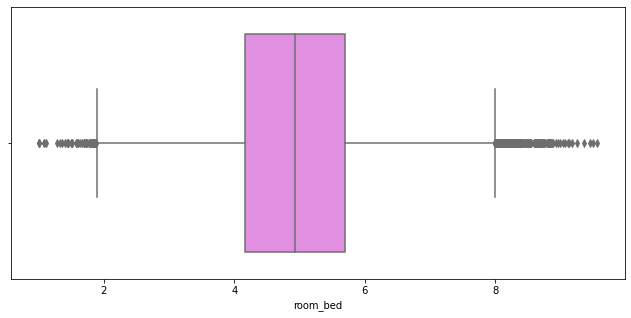

In [ ]:
plt.figure(figsize=(11,5))
sns.boxplot(housing['room_bed'], color='brown')

plt.figure(figsize=(11,5))
sns.boxplot(housing1['room_bed'], color='violet')

plt.show()

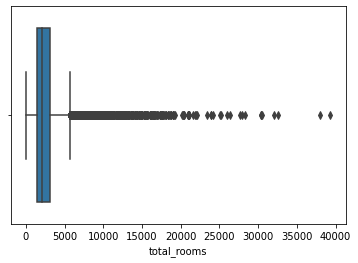

In [ ]:
sns.boxplot(x='total_rooms', data=housing)

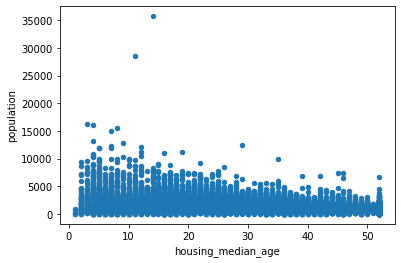

In [ ]:
housing1.plot.scatter(x='housing_median_age', y='population')

In [ ]:
# Plot data for the housing having population less than 20000
housing1 = housing1.loc[ housing1['population']<20000]

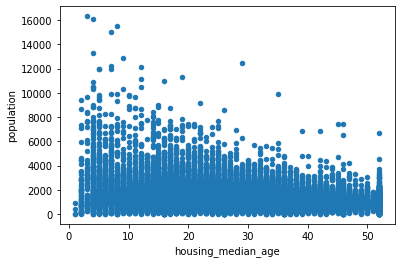

In [ ]:
housing1.plot.scatter(x='housing_median_age', y='population')

In [ ]:
housing1['pop_house'] = housing1['households'] / housing1['population']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa412647278>,
      dtype=object)

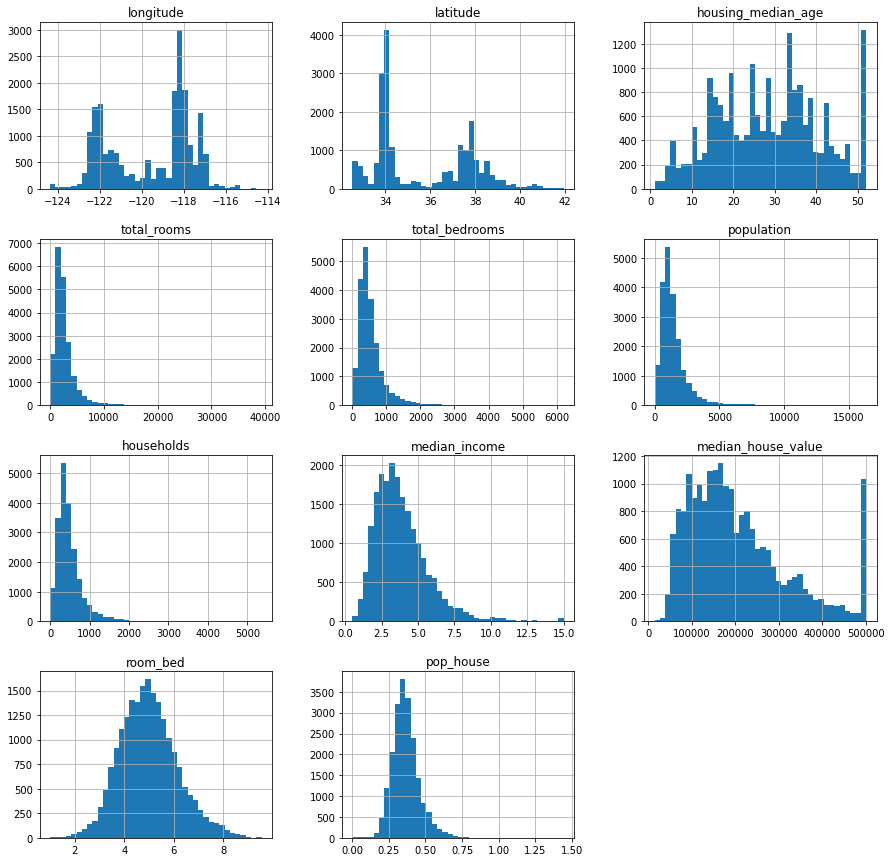

In [ ]:
housing1.hist(bins=40, figsize=(15,15))

<Figure size 3600x2160 with 0 Axes>

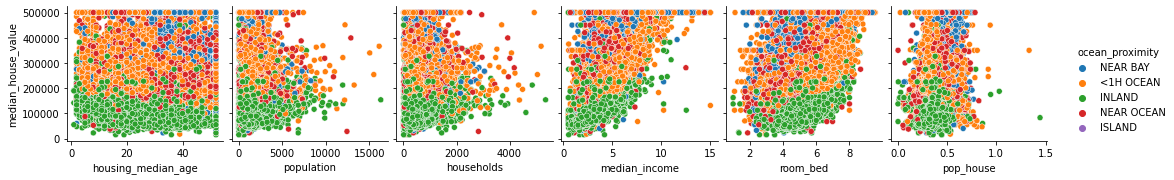

In [ ]:
# compare the plot below and above for changes in median price of houses with respect to 
plt.figure(figsize=(50,30))
sns.pairplot(housing1, x_vars=['housing_median_age', 'population', 'households', 'median_income','room_bed','pop_house'],y_vars ='median_house_value',hue = 'ocean_proximity')
plt.show()

In [ ]:
# Storing scores of all the models in dict
all_models_score = {}

## Base model

In [ ]:
# let use see how it is predicting house price for simple regression 
bmhouse_df = housing.copy()
bmhouse_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'room_bed'],
      dtype='object')

In [ ]:
bmhouse_df = bmhouse_df.dropna() # dealing with null values because it causes error during training 
bmhouse_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
room_bed              0
dtype: int64

In [ ]:
# let's normalize value numerical data for further calculation  
# Using Sci-kit learn library
scaler = MinMaxScaler() # Transform features by scaling each feature to a given range.
column_names_to_normalize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       ] # Omitting ocean_proximity 
x = bmhouse_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = bmhouse_df.index)
bmhouse_df[column_names_to_normalize] = df_temp 

In [ ]:
# normalized data 
bmhouse_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_bed
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,NEAR BAY,6.821705
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,NEAR BAY,6.418626
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,NEAR BAY,7.721053
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,NEAR BAY,5.421277
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,NEAR BAY,5.810714


In [ ]:
# Let us create train test data as well as input and output
bm_data = bmhouse_df.copy()
bm_y = bm_data['median_house_value'] # Our output 

# drop unnecessary columns
# 1. our output median_house_value, 2. categorical value ocean_proximity
bm_data.drop(columns=['median_house_value', 'ocean_proximity', 'room_bed'], inplace=True)

# Now split the data
bmX_train, bmX_test, bmY_train, bmY_test = train_test_split(bm_data, bm_y, test_size=0.21, random_state=4)

In [ ]:
bm_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776


In [ ]:
print(bmX_train)
print(bmY_train)

       longitude  latitude  ...  households  median_income
1552    0.237052  0.557917  ...    0.126953       0.421594
17914   0.235060  0.512221  ...    0.054103       0.288010
7081    0.631474  0.148778  ...    0.053610       0.304768
17832   0.248008  0.517535  ...    0.093241       0.345333
9352    0.177291  0.575983  ...    0.077290       0.598854
...          ...       ...  ...         ...            ...
17003   0.205179  0.532412  ...    0.142246       0.268279
11980   0.683267  0.153029  ...    0.073508       0.299113
17259   0.461155  0.199787  ...    0.065285       0.144964
8455    0.597610  0.145590  ...    0.065285       0.263362
17697   0.250996  0.503719  ...    0.042756       0.234548

[16142 rows x 8 columns]
1552     312500.0
17914    298300.0
7081     188700.0
17832    178900.0
9352     500001.0
           ...   
17003    270100.0
11980    160600.0
17259    250000.0
8455     269700.0
17697    178600.0
Name: median_house_value, Length: 16142, dtype: float64


In [ ]:
print(bmX_test)
print('\n')
print(bmY_test)

       longitude  latitude  ...  households  median_income
13167   0.296813  0.455898  ...    0.098504       0.293796
17566   0.243028  0.507970  ...    0.045881       0.173080
19593   0.346614  0.537726  ...    0.140602       0.149101
13825   0.717131  0.206164  ...    0.008880       0.112074
19554   0.334661  0.539851  ...    0.084526       0.072523
...          ...       ...  ...         ...            ...
9684    0.269920  0.444208  ...    0.135833       0.253397
8528    0.598606  0.143464  ...    0.069396       0.336071
10418   0.670319  0.093518  ...    0.071370       0.243410
14725   0.731076  0.027630  ...    0.070712       0.151274
13921   0.831673  0.167906  ...    0.089295       0.112074

[4291 rows x 8 columns]


13167    216000.0
17566    180800.0
19593     86200.0
13825     64800.0
19554     54100.0
           ...   
9684     159900.0
8528     244500.0
10418    500001.0
14725    160200.0
13921     57700.0
Name: median_house_value, Length: 4291, dtype: float64


In [ ]:
# Let us apply Linear regression and check the effect on it.
model = linear_model.LinearRegression()
model.fit(bmX_train, bmY_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
bmy_pred = model.predict(bmX_test)

In [ ]:
print(len(bmy_pred))

4291


In [ ]:
MSE = metrics.mean_squared_error(bmY_test, bmy_pred)
RMSE = np.sqrt(MSE)
scores = model.score(bmX_train, bmY_train)
all_models_score['BaseModel'] = (RMSE,scores*100)
print(MSE,RMSE,scores*100)

5049119760.837816 71057.15840672083 64.14365430938061


In [ ]:
pd.DataFrame(zip(bmY_test, bmy_pred), columns=['True', 'Prdeiction'])

,True,Prdeiction
0,216000.0,235483.863489
1,180800.0,219613.778717
2,86200.0,124075.158823
3,64800.0,77276.192468
4,54100.0,85394.424755
...,...,...
4286,159900.0,222085.610161
4287,244500.0,289755.002333
4288,500001.0,230090.138140
4289,160200.0,183366.022223


In [ ]:
model.score(bmX_train, bmY_train) * 100

64.14365430938061

# Second model

In above model we have not used ocean proximity. <br>
In dataframe housing1 we have added other attrribute such as room_bed. <br>

Let us see how it chages results 

In [ ]:
# Let us create categorical variable into dummy/indicator variables.
housing1 = pd.get_dummies(housing1,columns=['ocean_proximity']) 

KeyError: ignored

In [ ]:
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_bed,pop_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.821705,0.391304,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.418626,0.473969,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,7.721053,0.356855,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.421277,0.392473,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,5.810714,0.458407,0,0,0,1,0


In [ ]:
# let us normalize data in housing1 dataframe
housing1_norm = housing1.copy()

scaler = MinMaxScaler() # Normalize data in specific range 

column_names_to_normalize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'room_bed', 'pop_house'] # selecting columns to normalize
x = housing1_norm[column_names_to_normalize].values # Take values from columns 
x_scaled = scaler.fit_transform(x)

# create a dataframe which you want to replace in housing1_norm
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index=housing1_norm.index)
housing1_norm[column_names_to_normalize] = df_temp

In [ ]:
housing1_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_bed,pop_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.020615,0.019568,0.023334,0.539668,0.902266,0.680901,0.270497,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.177967,0.147099,0.212246,0.538027,0.708247,0.633757,0.327758,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.030440,0.030242,0.032854,0.466028,0.695051,0.786088,0.246634,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.037687,0.034045,0.040694,0.354699,0.672783,0.517108,0.271306,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.044935,0.034474,0.048161,0.230776,0.674638,0.562657,0.316978,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa411d510b8>,
      dtype=object)

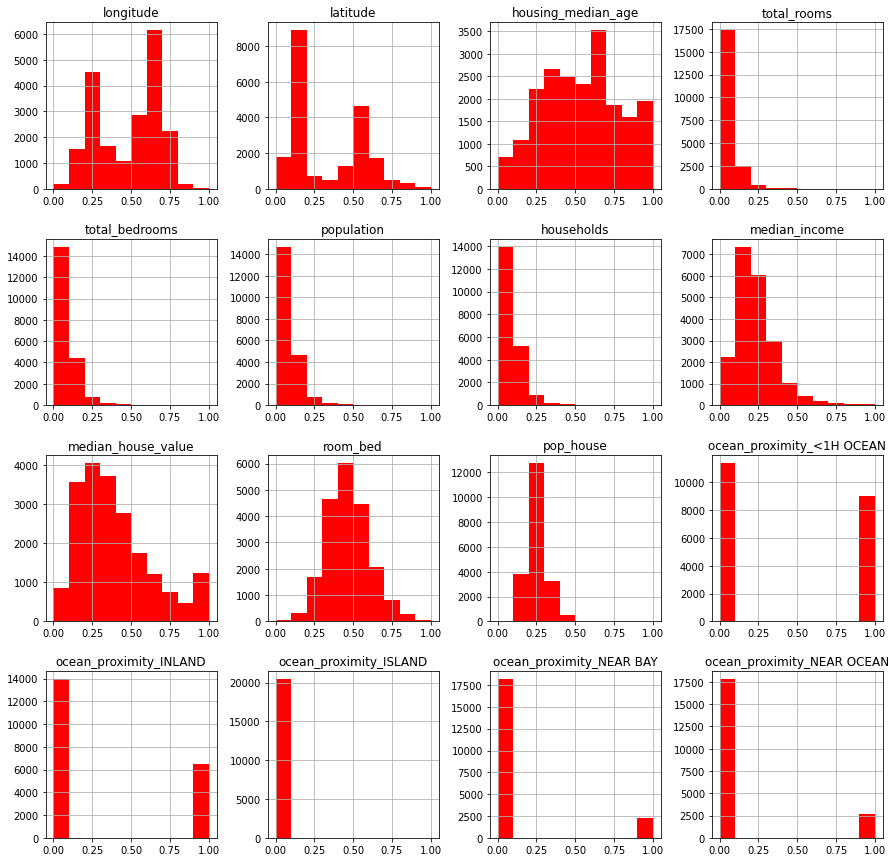

In [ ]:
housing1_norm.hist(figsize=(15,15), grid=True, color='red')

In [ ]:
# Create a first model (Otherthan Base Model) 
m1_data = housing1_norm.copy()

# data for train and test 
m1_out = housing1['median_house_value']
m1_data.drop(columns=['total_rooms',
       'total_bedrooms','population','households','ocean_proximity_ISLAND'],inplace=True)
m1_in = m1_data.copy()

In [ ]:
m1_in.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,room_bed,pop_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.539668,0.902266,0.680901,0.270497,0,0,1,0
1,0.212151,0.565356,0.392157,0.538027,0.708247,0.633757,0.327758,0,0,1,0
2,0.210159,0.564293,1.000000,0.466028,0.695051,0.786088,0.246634,0,0,1,0
3,0.209163,0.564293,1.000000,0.354699,0.672783,0.517108,0.271306,0,0,1,0
4,0.209163,0.564293,1.000000,0.230776,0.674638,0.562657,0.316978,0,0,1,0


In [ ]:
m1_in_train, m1_in_test, m1_out_train, m1_out_test = train_test_split(m1_in, m1_out, test_size=0.10, random_state=4)

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(m1_in_train, m1_out_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model1_pred = model1.predict(m1_in_test)


In [ ]:
print(type(m1_out_test))

<class 'pandas.core.series.Series'>


In [ ]:
print(len(model1_pred))
print(type(model1_pred))

2043
<class 'numpy.ndarray'>


In [ ]:
print(m1_out_test.index)

Int64Index([ 7464,  6315, 17819,  4628,  7987,  4014,  2383,  3236,  9678,
             1765,
            ...
            12120,    38, 19478, 13127,  1368, 18878,  1540,   856, 10077,
            14804],
           dtype='int64', length=2043)


In [ ]:
print(model1_pred)

[146400. 382500. 500001. ... 231800.  95800.  67500.]


In [ ]:
# different scores

MSE = metrics.mean_squared_error(m1_out_test, model1_pred)
RMSE = np.sqrt(MSE)
print(MSE, RMSE)

3.258632797467669e-20 1.805168357097938e-10


In [ ]:
pd.DataFrame(zip(m1_out_test, model1_pred), columns=['True', 'Prediction'])

,True,Prediction
0,146400.0,146400.0
1,382500.0,382500.0
2,500001.0,500001.0
3,412500.0,412500.0
4,173000.0,173000.0
...,...,...
2038,162500.0,162500.0
2039,390600.0,390600.0
2040,231800.0,231800.0
2041,95800.0,95800.0


In [ ]:
model1.score(m1_in_train, m1_out_train)

1.0

So our model is performing better. <br>
It gives us better performance score after normalizationa and data transformation 